In [34]:
from sklearn import datasets, tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression




import math

training_meanX = []
training_stdX = []
training_meanY = []
training_stdY = []
training_meanZ = []
training_stdZ = []

testing_meanX = []
testing_stdX = []
testing_meanY = []
testing_stdY = []
testing_meanZ = []
testing_stdZ = []

training_dataX = []
training_dataY = []
training_dataZ = []
target_data = []
testing_dataX = []
testing_dataY = []
testing_dataZ = []

CSV = ["Walking.csv", "Sitting.csv","Jogging.csv", "Driving.csv", "Stairs.csv"]

for filename in CSV:

    new_survey =pd.read_csv(filename)
    dsurvey = pd.DataFrame(new_survey)
    survey_values = [0,0,0,0,0]
    dsurvey = dsurvey.dropna()

    sumX = 0
    sumY= 0
    sumZ= 0
    count = 0
    section = 10000


    for i, j in dsurvey.iterrows():
        # print(i,j)
        # print(j)
        count += 1
        if section > 300000:
            section = 0
            sumX = 0
            sumY = 0
            sumZ = 0
            count = 0
            break
        for k in j.iteritems():
            if k[0] == "relative_time":
                # print(k[1], "Relative Time")
                if k[1] > section:
                    section += 10000
                    meanX = sumX/count
                    meanY = sumY/count
                    meanZ = sumZ/count
                    if section > 250000:
                        testing_meanX.append(meanX)
                        testing_meanY.append(meanY)
                        testing_meanZ.append(meanZ)
                    else:
                        training_meanX.append(meanX)
                        training_meanY.append(meanY)
                        training_meanZ.append(meanZ)
                    sumX = 0
                    sumY = 0
                    sumZ = 0
                    count = 0

            if k[0] == "AccX":
                sumX += k[1]
            if k[0] == "AccY":
                sumY += k[1]
            if k[0] == "AccZ":
                sumZ += k[1]


    for i, j in dsurvey.iterrows():
        # print(i,j)
        # print(j)
        count += 1
        index = section % 1000
        if section > 300000:
            sumX = 0
            sumY = 0
            sumZ = 0
            count = 0
            break
        for k in j.iteritems():
            if k[0] == "relative_time":
                # print(k[1], "Relative Time")
                if k[1] > section:
                    section += 10000
                    stdX = math.sqrt(sumX / count)
                    stdY = math.sqrt(sumY / count)
                    stdZ = math.sqrt(sumZ / count)
                    if section > 250000:
                        testing_stdX.append(stdX)
                        testing_stdY.append(stdY)
                        testing_stdZ.append(stdZ)
                    else:
                        training_stdX.append(stdX)
                        training_stdY.append(stdY)
                        training_stdZ.append(stdZ)
                    sumX = 0
                    sumY = 0
                    sumZ = 0
                    count = 0


            if k[0] == "AccX":
                # print(index)
                # print(training_meanX)
                # print(len(training_meanX))
                sumX += ((k[1]-training_meanX[index]) ** 2)
            if k[0] == "AccY":
                sumY += ((k[1]-training_meanY[index]) ** 2)
            if k[0] == "AccZ":
                sumZ += ((k[1]-training_meanZ[index]) ** 2)



for index in range(0,120):

    training_dataX.append([training_meanX[index]] + [training_stdX[index]])
    training_dataY.append([training_meanY[index]] + [training_stdY[index]])
    training_dataZ.append([training_meanZ[index]] + [training_stdZ[index]])
    target_data.append(index//24)




for index in range(0,30):

    testing_dataX.append([testing_meanX[index]] + [testing_stdX[index]])
    testing_dataY.append([testing_meanY[index]] + [testing_stdY[index]])
    testing_dataZ.append([testing_meanZ[index]] + [testing_stdZ[index]])


X = training_dataX
Y = training_dataY
Z = training_dataZ
target = target_data







Decision Tree Answers [0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 2 4 3 3 3 3 3 3 0 4 4 4 0 0]


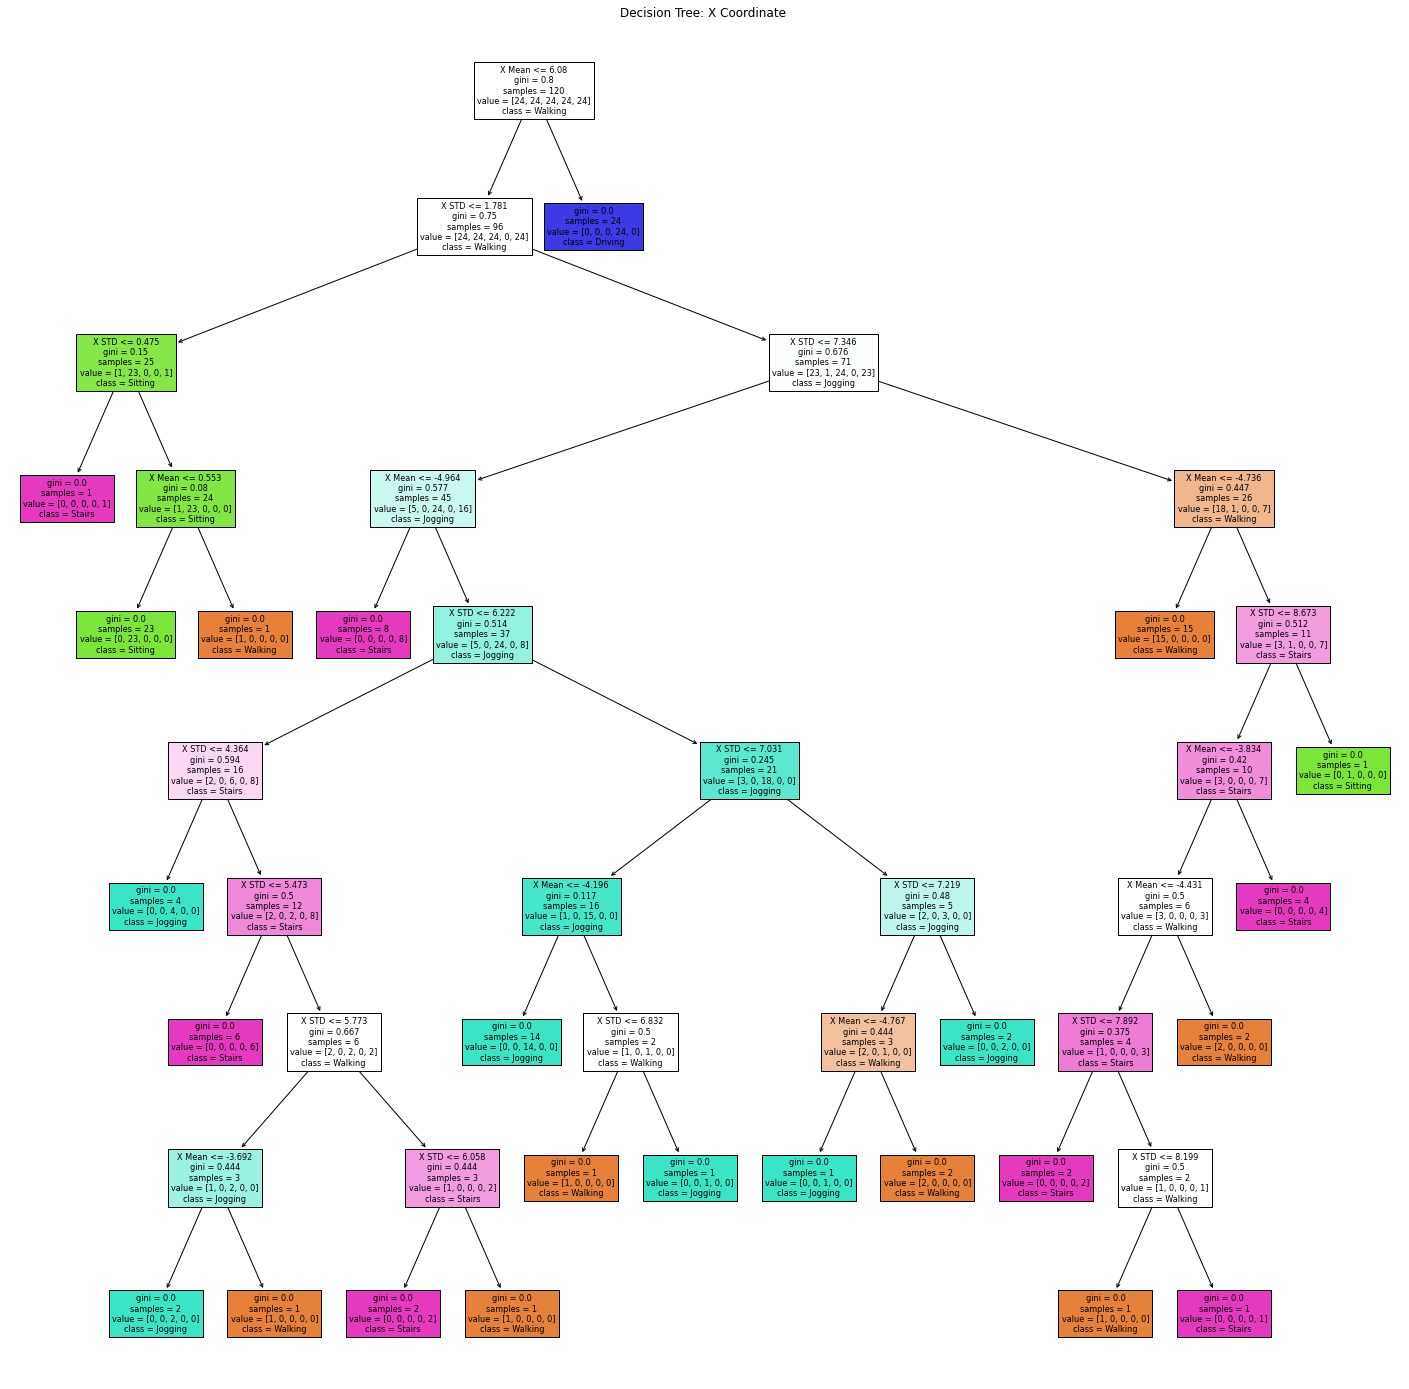

In [45]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, target)
features = ["X Mean", "X STD"]
classes = ["Walking", "Sitting", "Jogging", "Driving", "Stairs"]
answers = clf.predict(testing_dataX)

fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(clf,
                   feature_names=features,
                   class_names=classes,
                   filled=True)

print("Decision Tree Answers", answers)
plt.title("Decision Tree: X Coordinate ")
plt.show()

Decision Tree Answers [0 4 0 0 0 0 1 1 1 1 1 1 2 0 2 0 2 4 3 3 3 3 3 3 4 2 4 4 2 4]


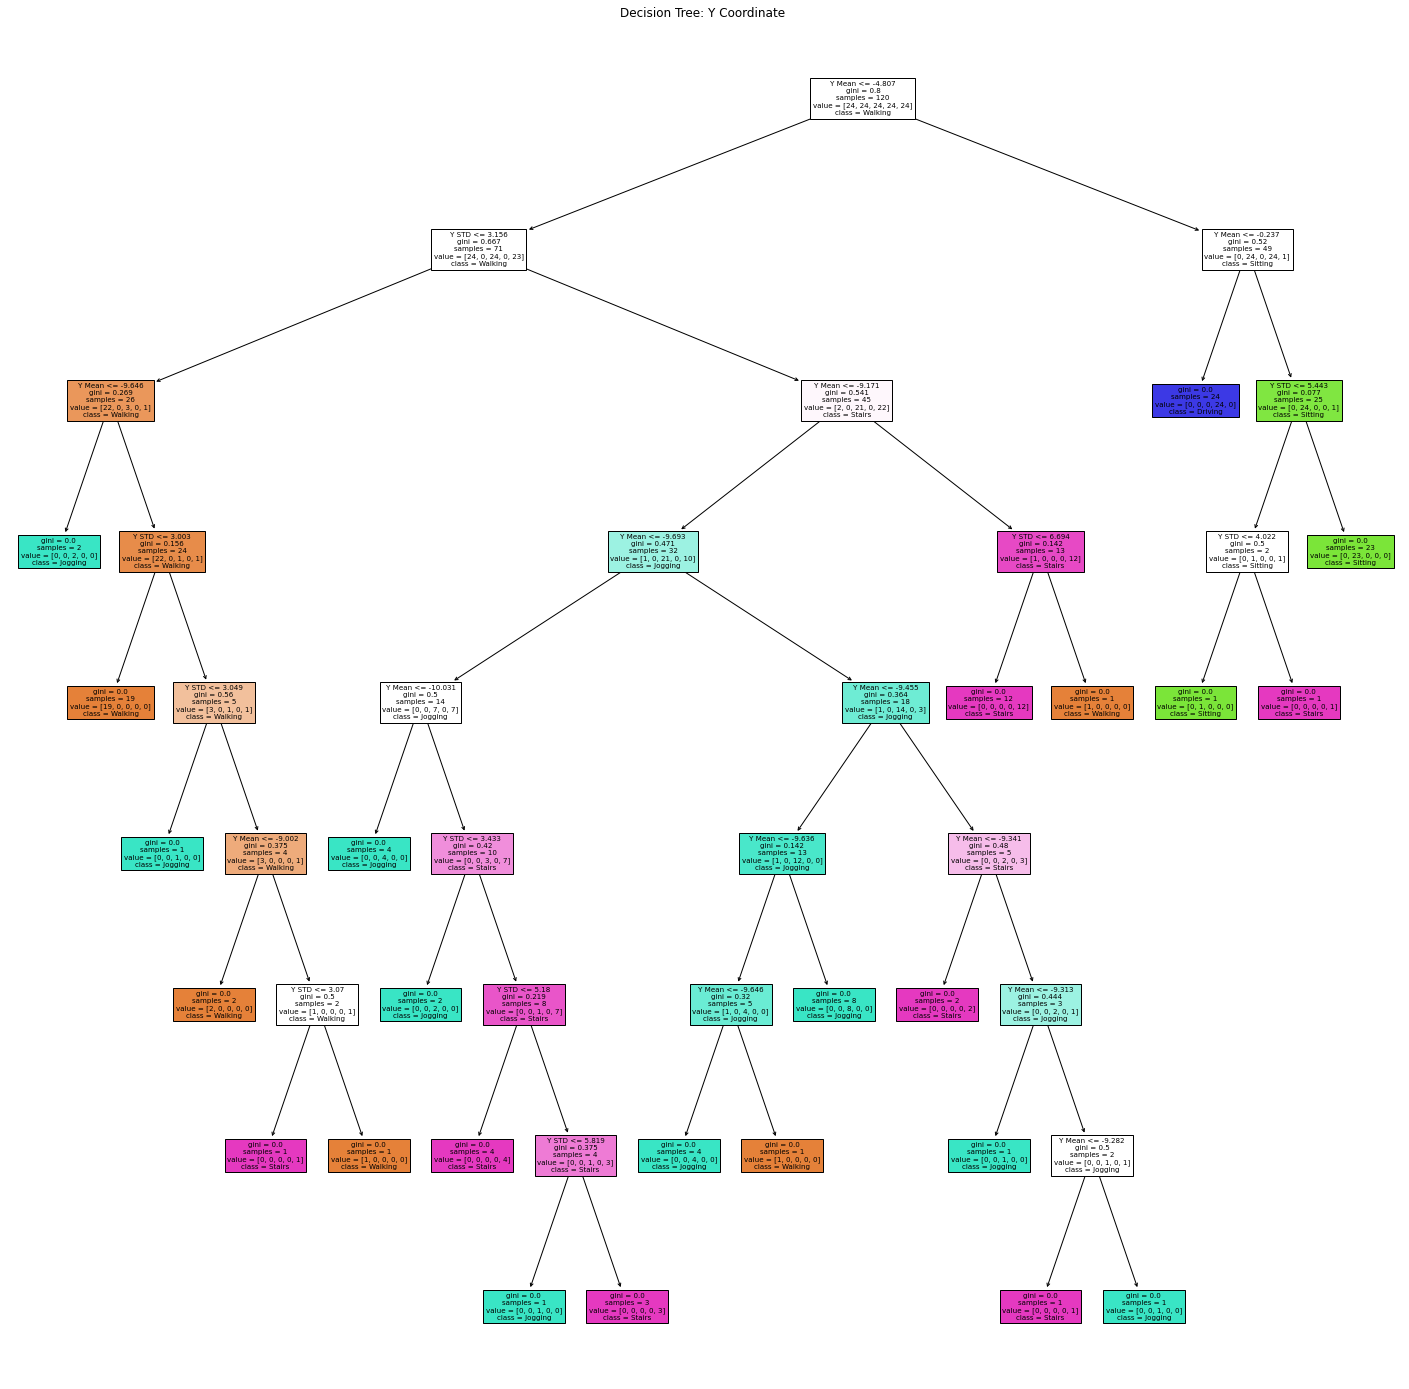

In [47]:
# fit a k-nearest neighbor model to the data
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(Y, target)
features = ["Y Mean", "Y STD"]
classes = ["Walking", "Sitting", "Jogging", "Driving", "Stairs"]
answers = clf.predict(testing_dataY)

fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(clf,
                   feature_names=features,
                   class_names=classes,
                   filled=True)

print("Decision Tree Answers", answers)
plt.title("Decision Tree: Y Coordinate ")
plt.show()

Decision Tree Answers [0 0 0 0 0 0 1 1 1 1 1 1 4 2 4 4 4 2 3 3 3 3 3 2 2 4 3 3 3 3]


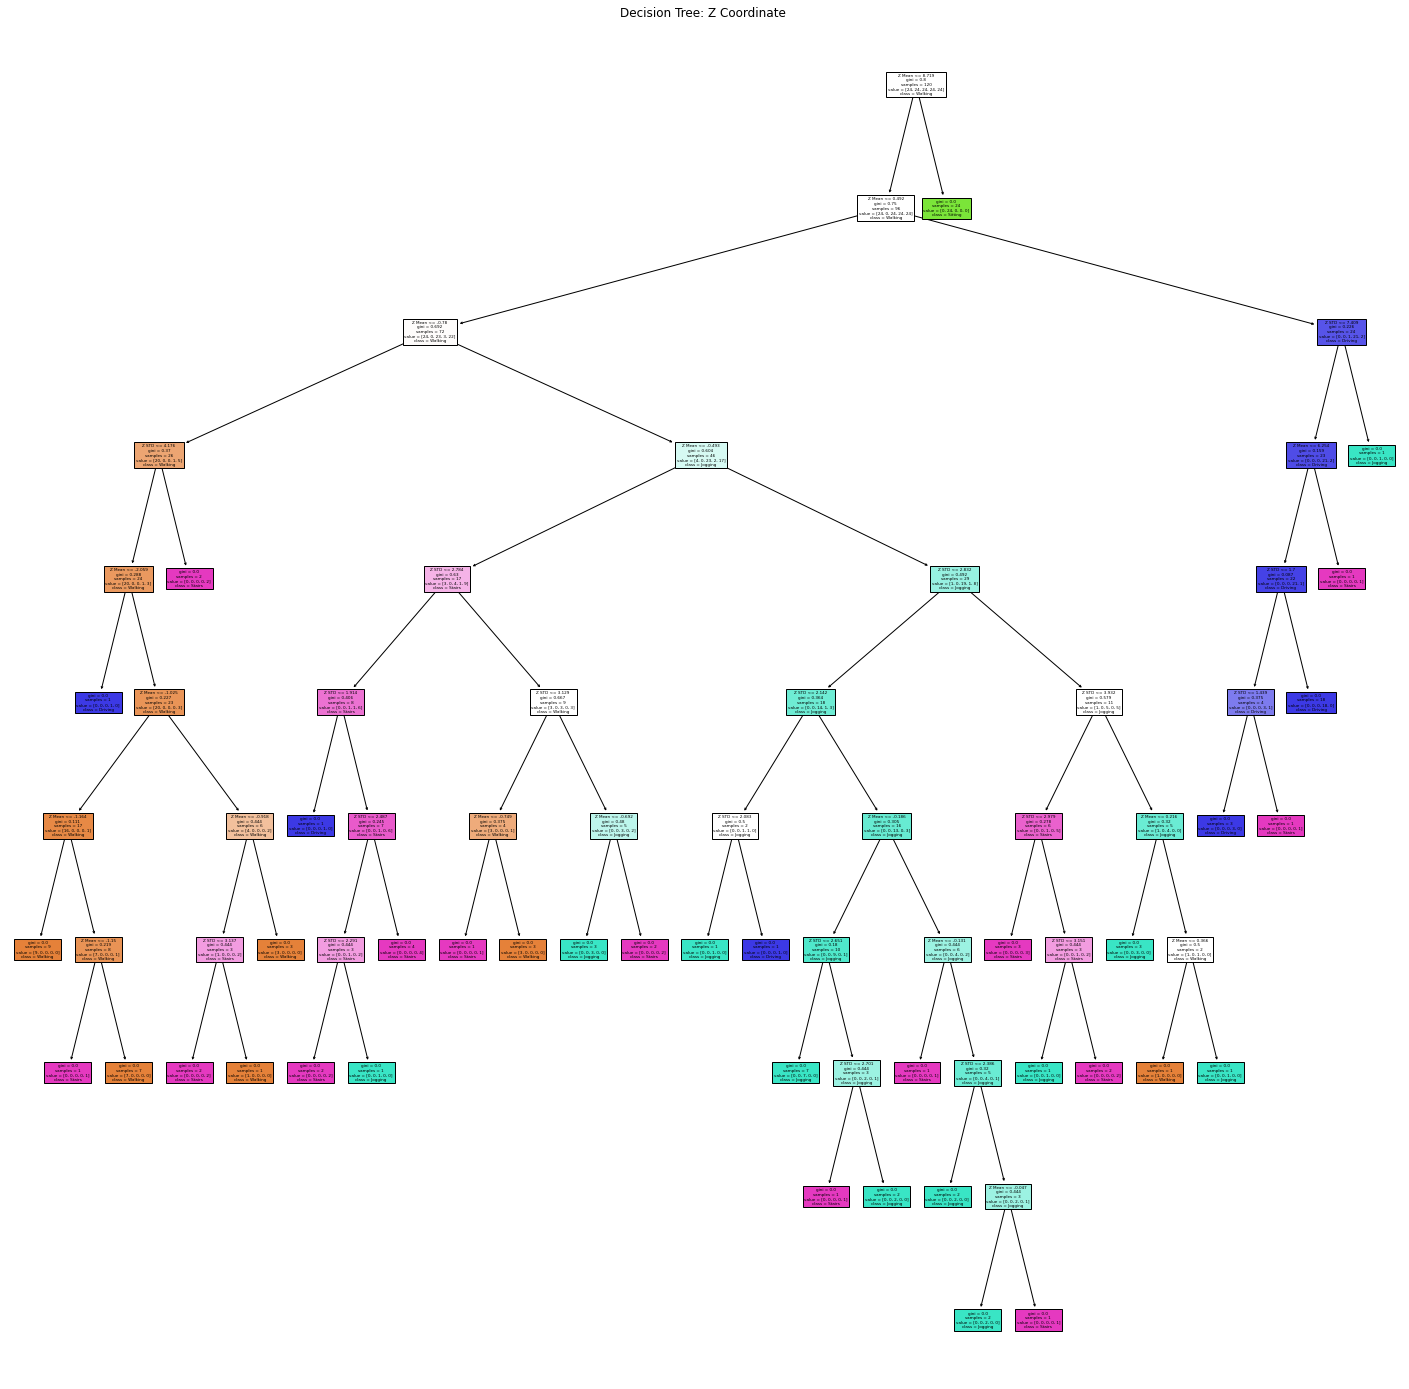

In [46]:
# fit a k-nearest neighbor model to the data
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(Z, target)
features = ["Z Mean", "Z STD"]
classes = ["Walking", "Sitting", "Jogging", "Driving", "Stairs"]
answers = clf.predict(testing_dataZ)


fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(clf,
                   feature_names=features,
                   class_names=classes,
                   filled=True)

print("Decision Tree Answers", answers)

plt.title("Decision Tree: Z Coordinate ")

plt.show()

In [55]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X, target)

predictions = logisticRegr.predict(testing_dataX)
print("Linear Regression", predictions)


# Plot outputs
# plt.scatter(testing_dataX, testing_dataX, color='black')
# plt.plot(testing_dataX, predictions, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Linear Regression [0 0 0 0 0 0 1 1 1 1 1 1 2 4 2 2 2 0 3 3 3 3 3 3 4 2 4 4 4 0]


c:\users\calvin\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
logisticRegr = LogisticRegression()
logisticRegr.fit(Y, target)

predictions = logisticRegr.predict(testing_dataY)
print("Linear Regression", predictions)

# Plot outputs
# plt.scatter(testing_dataY, testing_dataY, color='black')
# plt.plot(testing_dataY, predictions, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Linear Regression [0 0 0 0 0 0 1 1 1 1 1 1 2 0 2 0 0 0 3 3 3 3 3 3 2 2 4 4 4 4]


c:\users\calvin\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
logisticRegr = LogisticRegression()
logisticRegr.fit(Z, target)

predictions = logisticRegr.predict(testing_dataZ)
print("Linear Regression", predictions)

Linear Regression [0 0 0 0 0 0 1 1 1 1 1 1 4 4 4 4 4 4 3 2 3 3 3 4 4 4 3 3 3 3]


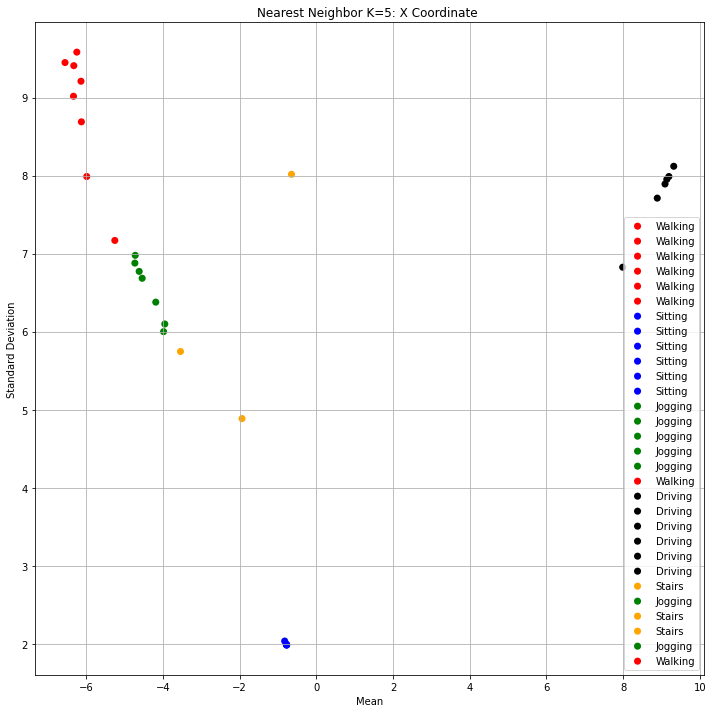

In [22]:
# fit a k-nearest neighbor model to the data
K = 5
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X, target)


fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
for guess in testing_dataX:
    x, y = guess
    scale = 50
    activity = model.predict([guess])
    if model.predict([guess]) == 0:
        color = 'red'
        classification = "Walking"
    if model.predict([guess]) == 1:
        color = 'blue'
        classification = "Sitting"
    if model.predict([guess]) == 2:
        color = 'green'
        classification = "Jogging"
    if model.predict([guess]) == 3:
        color = 'black'
        classification = "Driving"
    if model.predict([guess]) == 4:
        color = 'orange'
        classification = "Stairs"
    ax.scatter(x, y, c=color, s=scale, label=classification,
               alpha=1, edgecolors='none')
plt.title("Nearest Neighbor K=5: X Coordinate ")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")

ax.legend()
ax.grid(True)

plt.show()

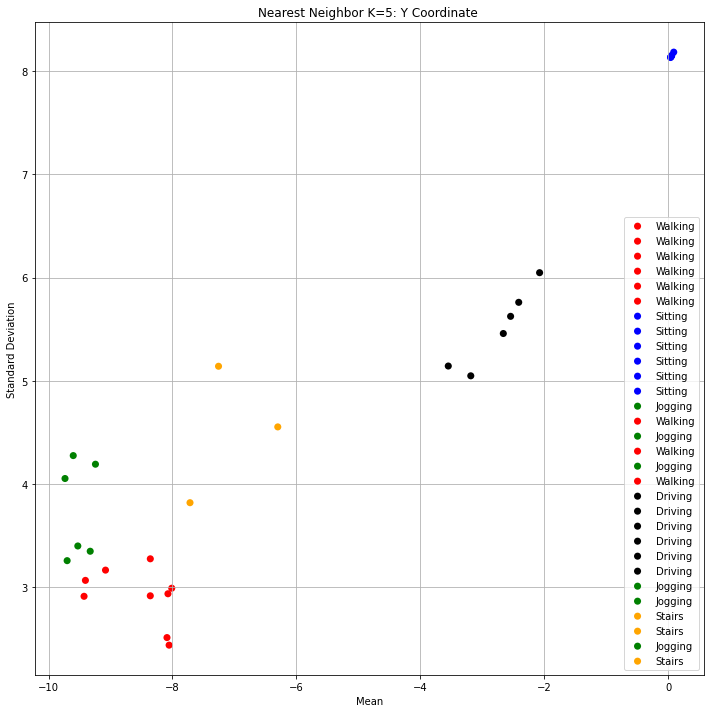

In [23]:
# fit a k-nearest neighbor model to the data
K = 5
model = KNeighborsClassifier(n_neighbors = K)
model.fit(Y, target)


fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
for guess in testing_dataY:
    x, y = guess
    scale = 50
    activity = model.predict([guess])
    if model.predict([guess]) == 0:
        color = 'red'
        classification = "Walking"
    if model.predict([guess]) == 1:
        color = 'blue'
        classification = "Sitting"
    if model.predict([guess]) == 2:
        color = 'green'
        classification = "Jogging"
    if model.predict([guess]) == 3:
        color = 'black'
        classification = "Driving"
    if model.predict([guess]) == 4:
        color = 'orange'
        classification = "Stairs"
    ax.scatter(x, y, c=color, s=scale, label=classification,
               alpha=1, edgecolors='none')
plt.title("Nearest Neighbor K=5: Y Coordinate ")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")

ax.legend()
ax.grid(True)

plt.show()

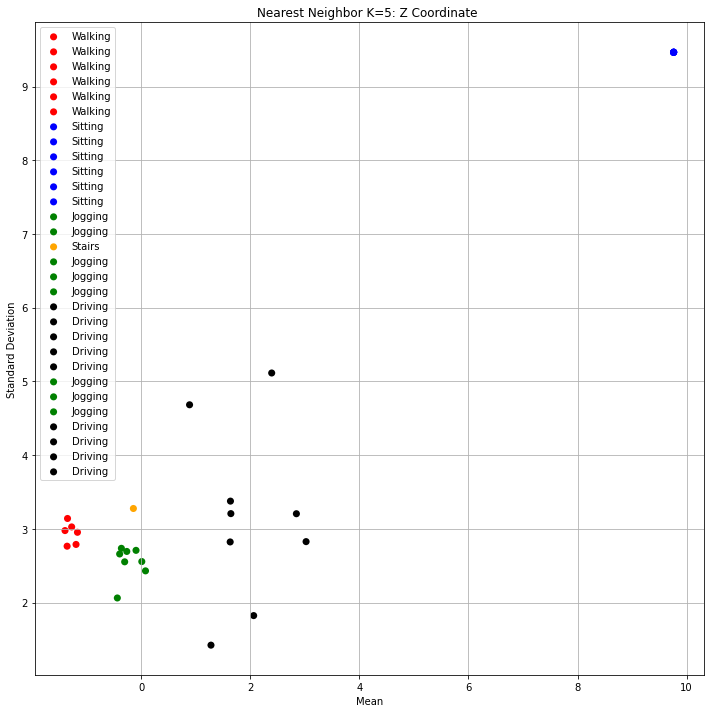

In [24]:
# fit a k-nearest neighbor model to the data
K = 5
model = KNeighborsClassifier(n_neighbors = K)
model.fit(Z, target)


fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
for guess in testing_dataZ:
    x, y = guess
    scale = 50
    activity = model.predict([guess])
    if model.predict([guess]) == 0:
        color = 'red'
        classification = "Walking"
    if model.predict([guess]) == 1:
        color = 'blue'
        classification = "Sitting"
    if model.predict([guess]) == 2:
        color = 'green'
        classification = "Jogging"
    if model.predict([guess]) == 3:
        color = 'black'
        classification = "Driving"
    if model.predict([guess]) == 4:
        color = 'orange'
        classification = "Stairs"
    ax.scatter(x, y, c=color, s=scale, label=classification,
               alpha=1, edgecolors='none')
plt.title("Nearest Neighbor K=5: Z Coordinate ")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")

ax.legend()
ax.grid(True)

plt.show()